# Initialization

This code has the correct Wff and Full expressions. Has the ANF conditions.

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from os import makedirs,path
from errno import EEXIST

import pandas as pd
from datetime import datetime, timezone, date

In [ ]:
def mkdir_p(mypath):
    # Creates a directory: same as mkdir or fulltime(path)
    try:
        makedirs(mypath)
    except OSError as exc:
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise




# Creating directory for a path

#filename = 'Figures/VariableSweeps/h={h}/Ni={Ni}/N={N}/rhos={rhos}/rhot={rhot}/rhob={rhob}'.format(h=h, Ni=Ni, N=N, rhos=rhos, rhot=rhot, rhob=rhob) #path for fig save

now = datetime.now()


datestring = now.strftime('%Y_%m_%d')
timestring= now.strftime("%H_%M")




fulltime = datetime.today().strftime('%Y-%m-%d/%H_%M')

filename = '/content/gdrive/MyDrive/Output/SphereVelCompare/{fulltime}'.format(fulltime=fulltime) #path for fig save

mkdir_p(filename)

In [ ]:
filename

'/content/gdrive/MyDrive/Output/SphereVelCompare/2024-04-18/03_11'

We make a simple model testing the singularity analysis of W FF

In [ ]:

#=============================================================================
# Physical Constants Exp. Data



R0 = 5.4 #xend value



A = 0.641
rhos = 1.36712

rhot = 1.34629
rhob=1.35

# mutop = 5.03263372
# mubottom = 5.276099152


mutop = 4.773326883
mubottom = 5.000284943


# mu = (mutop+mubottom)/2.0

mu = mutop
# expno = 1

g = 981.0



K = (1-2.10444*(A / R0)+2.08877*(A/R0)**3)




frtd = 4.0/3.0
hf = 0.5
thd = 1/3.0
sxth = 1/6.0
twonths = 2.0/9.0
svnhf = 7.0/ 2.0


oneoversixmuA = 1.0/ (6.0*np.pi*mu*A)
govereightpimu = g / (8.0*np.pi*mu)

In [ ]:
lightblue = '#89B3D1'
mediumblue = '#1F77B4'
darkblue = '#0A4A7A'

Create velocity and time arrays

In [ ]:
time_none = pd.read_csv('t_array_no_w.txt', dtype=float)

sphvels_none = pd.read_csv('sphvels_no_w.txt', dtype=float)


time_full = pd.read_csv('t_array_full.txt', dtype=float)

sphvels_full = pd.read_csv('sphvels_full.txt', dtype=float)


time_far = pd.read_csv('t_array_farfield.txt', dtype=float)

sphvels_far = pd.read_csv('sphvels_farfield.txt', dtype=float)


time_exp = pd.read_csv('t_array_exp.txt', dtype=float)[:370]

sphvels_exp = pd.read_csv('sphvels_exp.txt', dtype=float)[:370]


# Defining Terminal Velocities

In [ ]:
V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)

V_TermTopk =  (2*A**2 *g)/(9*mu)*(rhot-rhos)*K
V_TermBttmk = (2*A**2 *g)/(9*mu)*(rhob-rhos)*K

V_TermTopexp =  (2*A**2 *g)/(9*mutop)*(rhot-rhos)
V_TermBttmexp = (2*A**2 *g)/(9*mubottom)*(rhob-rhos)




In [ ]:
V_TermTopexp

-0.3908774768358958

In [ ]:
V_TermBttmexp

-0.3066772494848965

In [ ]:
-V_TermBttmk

0.2421292366875647

# Calculating Residence Times

Residence time = $|t_f - t_0|$ where $t_f$ is the time at which $V_s(t) < \kappa \cdot V_{Term, Bttm}$, and $t_0$ is the time at which $V_s(t) < V_{Term, Bttm}$ initially.

The residence time is *very* sensitive to the choice in $\kappa$. I reccomend plotting the experiment first and eyeballing the time. It should be $~ 95 \% \cdot V_{Term, Bttm}$.

In [ ]:
endcst = 0.985

In [ ]:
-endcst*V_TermBttm

0.3164399936331748

In [ ]:
-endcst*V_TermBttm

0.3164399936331748

In [ ]:
# No Stratification Flow Residence Time

firsttime_none = 1.0*(( sphvels_none*K < -V_TermBttmk) & (sphvels_none*K < -endcst*V_TermBttmk ))

firsttime_indicies_none = np.where(firsttime_none)[0]



t0_none_index = firsttime_indicies_none[0]
tf_none_index = firsttime_indicies_none[-1]

t0_none = time_none.iloc[t0_none_index][0]
tf_none = time_none.iloc[tf_none_index][0]


print('t0:', t0_none)
print('tf:', tf_none)

residencetime_none = abs(t0_none-tf_none)


print('residence time no-w:', residencetime_none)


t0: 25.0
tf: 124.0
residence time no-w: 99.0


In [ ]:
firsttime_full = 1.0*(( sphvels_full*K < -V_TermBttm*K) & (sphvels_full*K < -endcst*V_TermBttm*K ))

firsttime_indicies_full = np.where(firsttime_full)[0]



t0_full_index = firsttime_indicies_full[0]
tf_full_index = firsttime_indicies_full[-1]

t0_full = time_full.iloc[t0_full_index][0]
tf_full = time_full.iloc[tf_full_index][0]


print('t0:', t0_full)
print('tf:', tf_full)

residencetime_full = abs(t0_full-tf_full)

print('residence time full:', residencetime_full)

t0: 26.5
tf: 58.5
residence time full: 32.0


In [ ]:
firsttime_far = 1.0*(( sphvels_far < -V_TermBttm) & (sphvels_far < -endcst*V_TermBttm ))

firsttime_indicies_far = np.where(firsttime_far)[0]

t0_far_index = firsttime_indicies_far[0]
tf_far_index = firsttime_indicies_far[-1]

t0_far = time_far.iloc[t0_far_index][0]
tf_far = time_far.iloc[tf_far_index][0]


print('t0:', t0_far)
print('tf:', tf_far)

residencetime_far = abs(t0_far-tf_far)


print('residence time far:', residencetime_far)

t0: 30.0
tf: 41.5
residence time far: 11.5


In [ ]:
print('VTerm top exp=', V_TermTopexp)

VTerm top exp= -0.3908774768358958


In [ ]:
len(time_exp)/150

2.466666666666667

In [ ]:
endcst_exp = 0.95

In [ ]:
len(time_exp)

370

In [ ]:
T_before = 230

T_after = 75

In [ ]:
sphvels_exp_ref = sphvels_exp['0.2920431'][:T_before]

In [ ]:
-endcst_exp*V_TermBttmexp

0.29134338701065166

In [ ]:
firsttime_exp = 1.0*(( sphvels_exp['0.2920431'][T_after:] < -V_TermBttmexp) & (sphvels_exp_ref < -endcst_exp*V_TermBttmexp))


print('VTerm bttm cst*exp=', endcst*V_TermBttmexp)

firsttime_indicies_exp = np.where(firsttime_exp)[0]


t0_exp_index = firsttime_indicies_exp[0]
tf_exp_index = firsttime_indicies_exp[-1]

t0_exp = time_exp.iloc[t0_exp_index][0]
tf_exp = time_exp.iloc[tf_exp_index][0]


print('t0:', t0_exp)
print('tf:', tf_exp)


residencetime_exp = abs(t0_exp-tf_exp)


print('residence time exp:', residencetime_exp)

VTerm bttm cst*exp= -0.30207709074262307
t0: 25.35867
tf: 76.74333
residence time exp: 51.38466


# New Section

In [ ]:
##sphvels_full = sphvels_full.mul(1/K)

sphvels_expn = sphvels_exp.mul(1.0/K)

time_exp += -0.0

#time_exp = time_exp.mul(0.6)


**markdown**


In [ ]:
V_TermTopexp

-0.3908774768358958

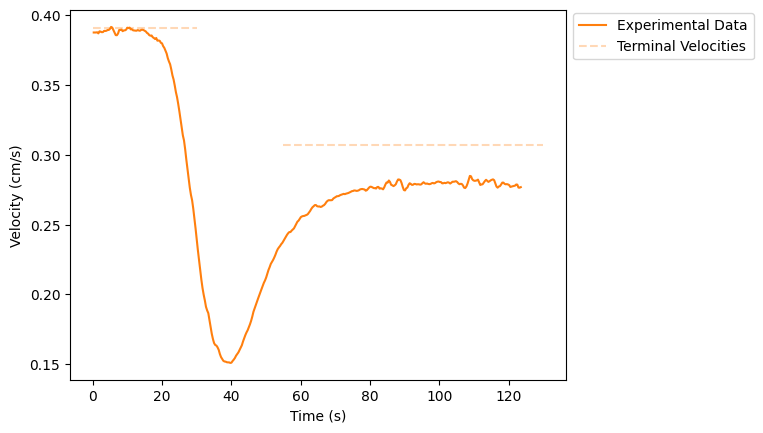

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')




plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
# plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



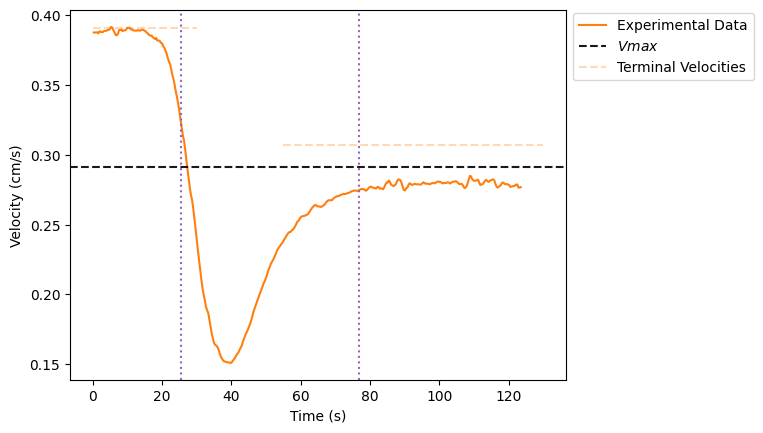

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

#plt.plot(time_none, sphvels_none, color='midnightblue', label='No Stratification-Flow')

#plt.plot(time_full, sphvels_full, color='blue', label='Full Field')

#plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')



#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


plt.axhline(y= -endcst_exp*V_TermBttmexp, color='k', linestyle='dashed', alpha=0.9, label = r'$V max$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')

plt.axvline(x=t0_exp, color='tab:purple', ls='dotted')
plt.axvline(x=tf_exp, color='tab:purple', ls='dotted')



plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
# plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



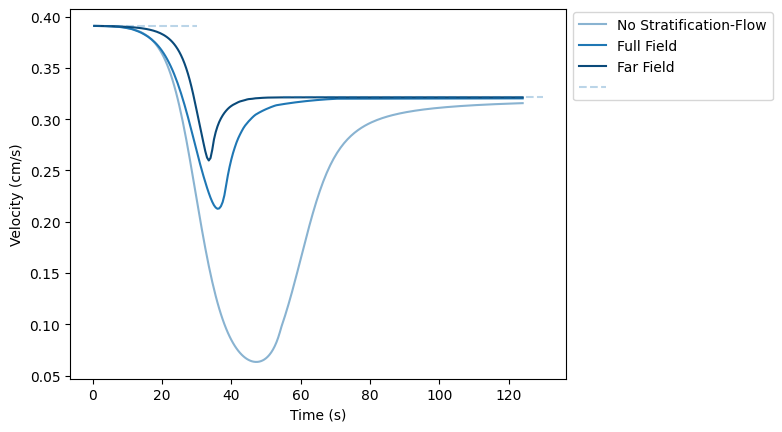

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_none, sphvels_none, color=lightblue, label='No Stratification-Flow')



plt.plot(time_full, sphvels_full, color=mediumblue, label='Full Field')

plt.plot(time_far, sphvels_far, color=darkblue, label='Far Field')

plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))




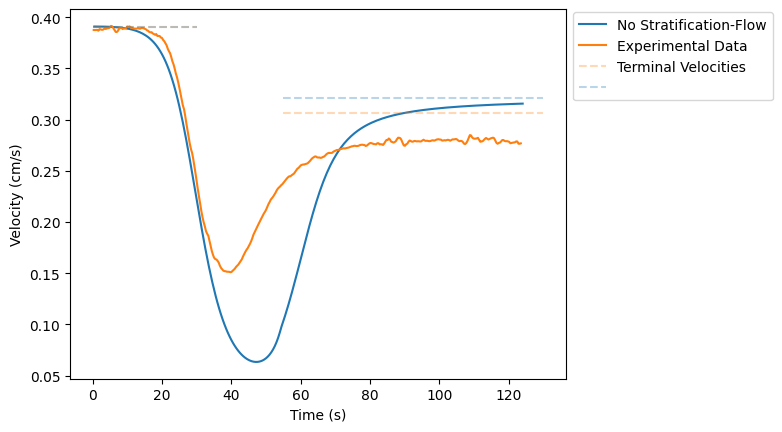

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

#plt.plot(time_none, sphvels_none, color='midnightblue', label='No Stratification-Flow')

#plt.plot(time_full, sphvels_full, color='blue', label='Full Field')

#plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


plt.plot(time_none, sphvels_none, color='tab:blue', label='No Stratification-Flow')

plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')



# plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')



#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


# plt.axhline(y= -V_TermTop, color='k', linestyle='dashed', alpha=0.3, label = r'$V_{Term,Top}$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')


# plt.axhline(y= 0.2946/K-0.02, color='tab:purple', linestyle='-.', alpha=0.8, label = r'$Experimental \,\, V_{Term,Top}$')

#plt.axhline(y= 0.211/K-0.02, color='tab:purple', linestyle='--', alpha=0.4, label = r'$Experimental \,\, V_{Term,Bottom}$')

plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

plt.savefig("{filename}/Velocity_v_time_comparison_no_w.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



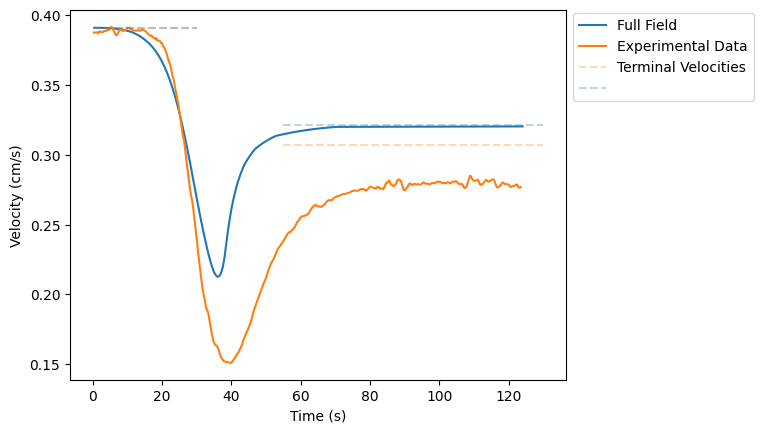

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

#plt.plot(time_none, sphvels_none, color='midnightblue', label='No Stratification-Flow')

plt.plot(time_full, sphvels_full, color='tab:blue', label='Full Field')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')



#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


# plt.axhline(y= -V_TermTop, color='k', linestyle='dashed', alpha=0.3, label = r'$V_{Term,Top}$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')


# plt.axhline(y= 0.2946/K-0.02, color='tab:purple', linestyle='-.', alpha=0.8, label = r'$Experimental \,\, V_{Term,Top}$')

#plt.axhline(y= 0.211/K-0.02, color='tab:purple', linestyle='--', alpha=0.4, label = r'$Experimental \,\, V_{Term,Bottom}$')

plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

plt.savefig("{filename}/Velocity_v_time_comparison_full.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



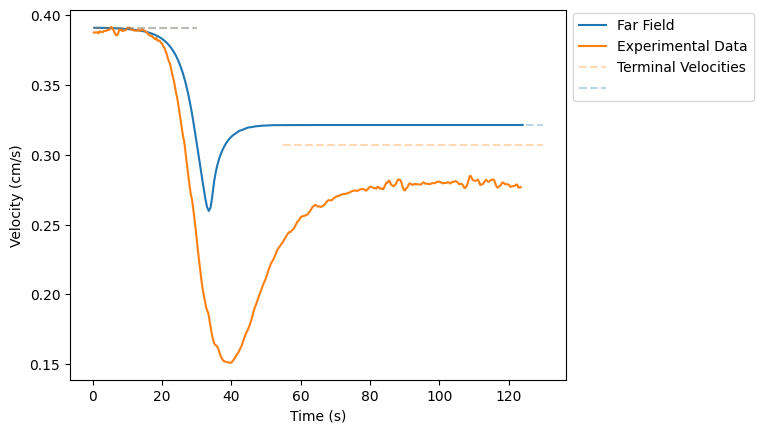

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

#plt.plot(time_none, sphvels_none, color='midnightblue', label='No Stratification-Flow')

plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')



#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


# plt.axhline(y= -V_TermTop, color='k', linestyle='dashed', alpha=0.3, label = r'$V_{Term,Top}$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')


# plt.axhline(y= 0.2946/K-0.02, color='tab:purple', linestyle='-.', alpha=0.8, label = r'$Experimental \,\, V_{Term,Top}$')

#plt.axhline(y= 0.211/K-0.02, color='tab:purple', linestyle='--', alpha=0.4, label = r'$Experimental \,\, V_{Term,Bottom}$')

plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

plt.savefig("{filename}/Velocity_v_time_comparison_far.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



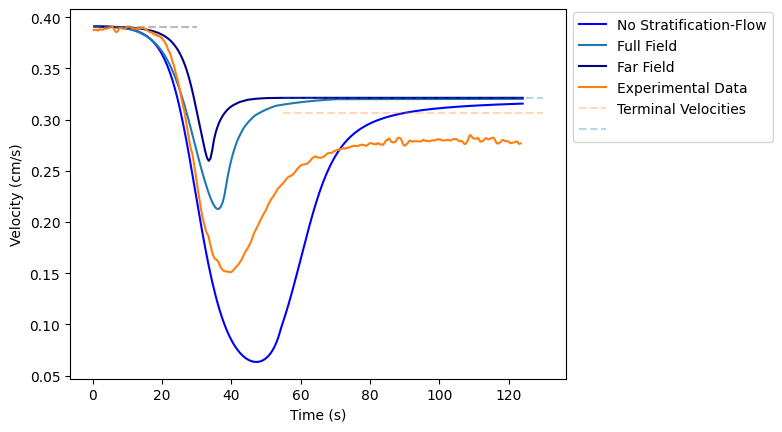

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_none, sphvels_none, color='blue', label='No Stratification-Flow')



plt.plot(time_full, sphvels_full, color='tab:blue', label='Full Field')

plt.plot(time_far, sphvels_far, color='darkblue', label='Far Field')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')


plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

plt.savefig("{filename}/Velocity_v_time_comparison.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



In [ ]:
sphvels_none_ref = sphvels_none['0.3908774768358958']

sphvels_full_ref = sphvels_full['0.3908774768358958']

sphvels_far_ref = sphvels_far['0.3908774768358958']

sphvels_exp_ref = sphvels_exp['0.2920431']

In [ ]:
min_vel_now = np.min(sphvels_none_ref.iloc[:int(0.75*len(sphvels_none_ref))])


min_vel_full = np.min(sphvels_full_ref.iloc[:int(0.75*len(sphvels_full_ref))])


min_vel_far = np.min(sphvels_far_ref.iloc[:int(0.75*len(sphvels_far_ref))])

min_vel_exp = np.min(sphvels_exp_ref.iloc[:int(0.75*len(sphvels_exp_ref))])




In [ ]:
tmin_now_index = sphvels_none[sphvels_none_ref == min_vel_now].index[0]

tmin_now = time_none.iloc[tmin_now_index][0]

tmin_full_index = sphvels_full[sphvels_full_ref == min_vel_full].index[0]

tmin_full = time_full.iloc[tmin_full_index][0]

tmin_far_index = sphvels_far[sphvels_far_ref == min_vel_far].index[0]

tmin_far = time_far.iloc[tmin_far_index][0]

tmin_exp_index = sphvels_exp[sphvels_exp_ref == min_vel_exp].index[0]

tmin_exp = time_exp.iloc[tmin_exp_index][0]




In [ ]:
print('tmin No W:', tmin_now)

print('tmin Dominant Full Field:', tmin_full)

print('tmin Far Field:', tmin_far)

print('tmin Experiment:', tmin_exp)


tmin No W: 47.0
tmin Dominant Full Field: 36.0
tmin Far Field: 33.5
tmin Experiment: 39.70633


In [ ]:
# slopes

accel_none = (-V_TermTop-min_vel_now)/(0-tmin_now)


accel_full = (-V_TermTop-min_vel_full)/(0-tmin_full)

accel_far = (-V_TermTop-min_vel_far)/(0-tmin_far)


accel_exp = (-V_TermTop-min_vel_exp)/(0-tmin_exp)


In [ ]:
print('accel No W:', accel_none)

print('accel Dominant Full Field:', accel_full)

print('accel Far Field:', accel_far)

print('acceL Experiment:', accel_exp)

accel No W: -0.006969246104360945
accel Dominant Full Field: -0.004951421205784319
accel Far Field: -0.0039152287368144235
acceL Experiment: -0.006978856440166991


In [ ]:
print('scaled accel No W:', -accel_none*100)

print('scaled accel Dominant Full Field:', -accel_full*100)

print('scaled accel Far Field:', -accel_far*100)

print('scaled acceL Experiment:', -accel_exp*100)

scaled accel No W: 0.6969246104360945
scaled accel Dominant Full Field: 0.49514212057843193
scaled accel Far Field: 0.39152287368144234
scaled acceL Experiment: 0.6978856440166991


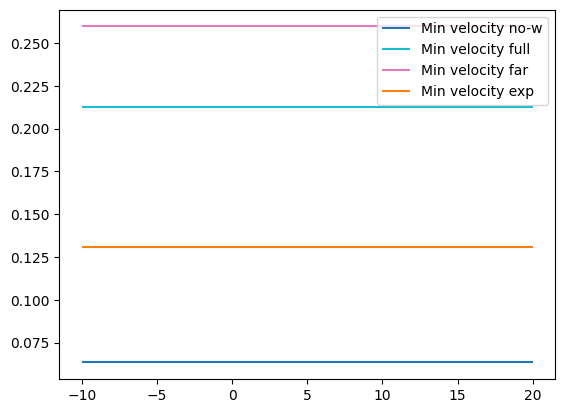

In [ ]:
longboi = np.linspace(0, 2, 100)

plt.hlines(y=min_vel_now, xmin=-10, xmax=20, color='tab:blue', label='Min velocity no-w')
plt.hlines(y=min_vel_full, xmin=-10, xmax=20, color='tab:cyan', label='Min velocity full')
plt.hlines(y=min_vel_far, xmin=-10, xmax=20, color='tab:pink', label='Min velocity far')
plt.hlines(y=min_vel_exp/K-0.02, xmin=-10, xmax=20, color='tab:orange', label='Min velocity exp')

plt.legend()

In [ ]:
print('No W min velocity:', min_vel_now)

print('Dominant Full Field min velocity:', min_vel_full)

print('Far Field min velocity:', min_vel_far)

print('Experimental Minimum velocity:', min_vel_exp)


No W min velocity: 0.0633229099309314
Dominant Full Field min velocity: 0.2126263134276603
Far Field min velocity: 0.2597173141526126
Experimental Minimum velocity: 0.1137727


In [ ]:
minvel_no_w_exp_diff = abs(min_vel_now-min_vel_exp)

minvel_full_exp_diff = abs(min_vel_full-min_vel_exp)

minvel_far_exp_diff = abs(min_vel_far-min_vel_exp)

In [ ]:
print('Error in No W min velocity:', minvel_no_w_exp_diff)

print('Error in full velocity:', minvel_full_exp_diff)

print('Error in far velocity:', minvel_far_exp_diff)


Error in No W min velocity: 0.050449790069068606
Error in full velocity: 0.0988536134276603
Error in far velocity: 0.14594461415261262


In [ ]:
print(r'None : t_{min}=', tmin_now, r': V_{min}=',min_vel_now, ': decceleration=', accel_none, ': Residence Time=', residencetime_none )

print(r'Full : t_{min}=', tmin_full, r': V_{min}=',min_vel_full, ': decceleration=', accel_full, ': Residence Time=', residencetime_full)

print(r'Far : t_{min}=', tmin_far, r': V_{min}=',min_vel_far, ': decceleration=', accel_far, ': Residence Time=', residencetime_far)

print(r'Experiment : t_{min}=', tmin_exp, r': V_{min}=',min_vel_exp, ': decceleration=', accel_exp, ': Residence Time=', residencetime_exp)



None : t_{min}= 47.0 : V_{min}= 0.0633229099309314 : decceleration= -0.006969246104360945 : Residence Time= 99.0
Full : t_{min}= 36.0 : V_{min}= 0.2126263134276603 : decceleration= -0.004951421205784319 : Residence Time= 32.0
Far : t_{min}= 33.5 : V_{min}= 0.2597173141526126 : decceleration= -0.0039152287368144235 : Residence Time= 11.5
Experiment : t_{min}= 39.70633 : V_{min}= 0.1137727 : decceleration= -0.006978856440166991 : Residence Time= 51.38466


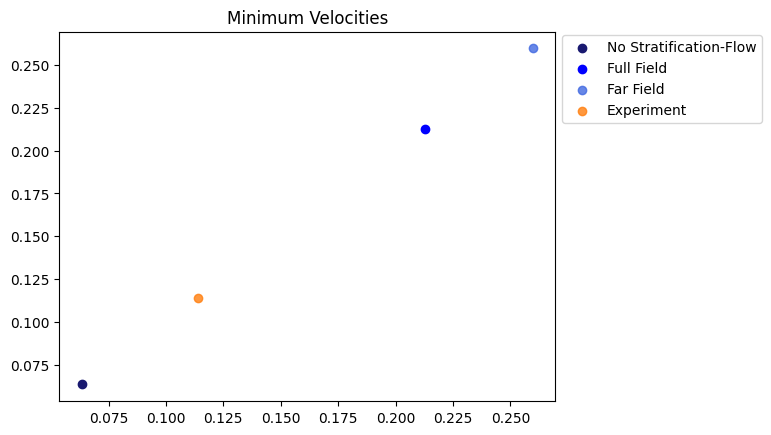

In [ ]:
plt.title('Minimum Velocities')

plt.scatter([min_vel_now], [min_vel_now], color='midnightblue', label='No Stratification-Flow')

plt.scatter([min_vel_full], [min_vel_full], color='blue', label='Full Field')


plt.scatter([min_vel_far], [min_vel_far], alpha=0.8, color='royalblue', label='Far Field')


plt.scatter([min_vel_exp], [min_vel_exp], alpha = 0.8, color='tab:orange', label='Experiment')



plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/MinimumVelocities_{fulltime}.png".format(filename=filename, fulltime=fulltime),bbox_inches ="tight", facecolor='white')


In [ ]:
# rate of changes



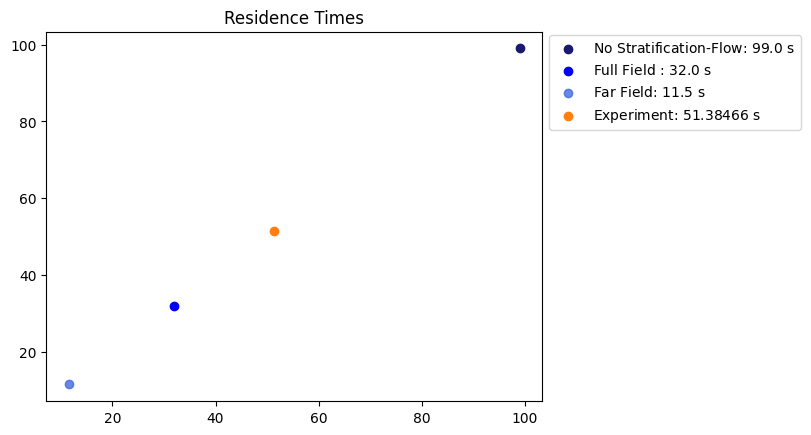

In [ ]:
plt.title('Residence Times')

plt.scatter([residencetime_none], [residencetime_none], color='midnightblue', label='No Stratification-Flow: ${res}$ s'.format(res=residencetime_none))

plt.scatter([residencetime_full], [residencetime_full], color='blue', label='Full Field : ${res}$ s'.format(res=residencetime_full))


plt.scatter([residencetime_far], [residencetime_far], alpha = 0.8, color='royalblue', label='Far Field: ${res}$ s'.format(res=residencetime_far))


plt.scatter([residencetime_exp], [residencetime_exp], color='tab:orange', label='Experiment: ${res}$ s'.format(res=residencetime_exp))


plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/ResidenceTimes_{fulltime}.png".format(filename=filename, fulltime=fulltime),bbox_inches ="tight", facecolor='white')




# Velocity Plots with Residence Time Bar

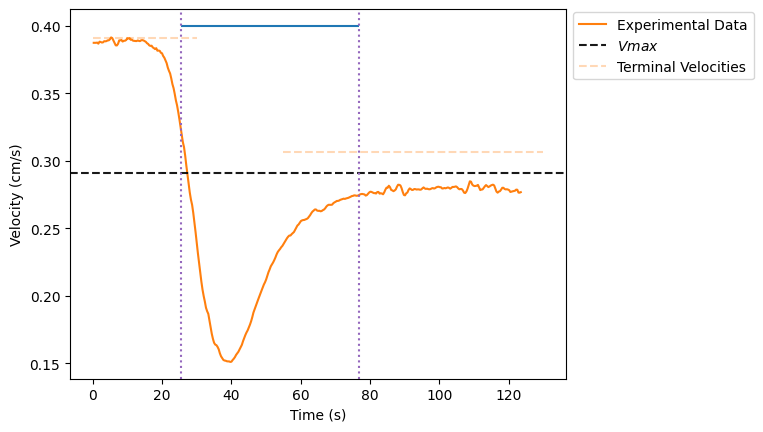

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

#plt.plot(time_none, sphvels_none, color='midnightblue', label='No Stratification-Flow')

#plt.plot(time_full, sphvels_full, color='blue', label='Full Field')

#plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')

plt.hlines(y=0.40, xmin=t0_exp, xmax=tf_exp)

#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


plt.axhline(y= -endcst_exp*V_TermBttmexp, color='k', linestyle='dashed', alpha=0.9, label = r'$V max$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')

plt.axvline(x=t0_exp, color='tab:purple', ls='dotted')
plt.axvline(x=tf_exp, color='tab:purple', ls='dotted')



plt.hlines(y=-V_TermTopexp,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttmexp,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
# plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



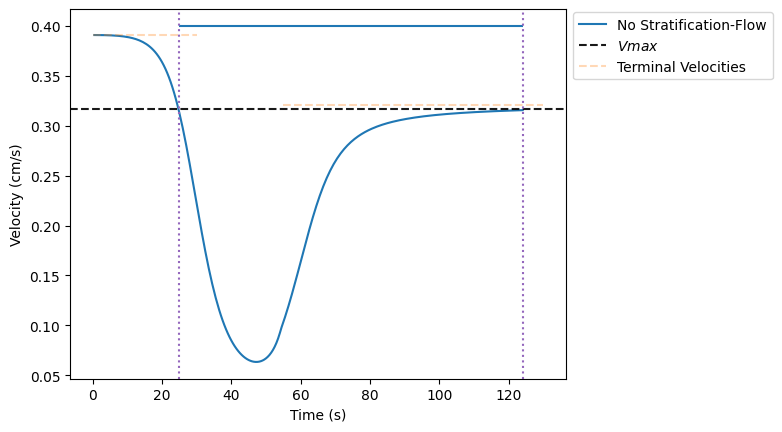

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')

plt.plot(time_none, sphvels_none, color=mediumblue, label='No Stratification-Flow')

#plt.plot(time_full, sphvels_full, color='blue', label='Full Field')

#plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


#plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')

plt.hlines(y=0.40, xmin=t0_none, xmax=tf_none)

#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


plt.axhline(y= -endcst*V_TermBttm, color='k', linestyle='dashed', alpha=0.9, label = r'$V max$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')

plt.axvline(x=t0_none, color='tab:purple', ls='dotted')
plt.axvline(x=tf_none, color='tab:purple', ls='dotted')



plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
# plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



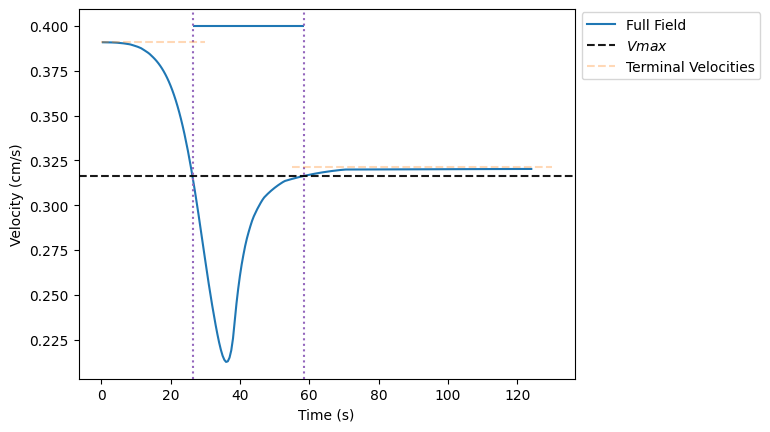

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_full, sphvels_full, color='tab:blue', label='Full Field')

#plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


#plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')

plt.hlines(y=0.40, xmin=t0_full, xmax=tf_full)

#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


plt.axhline(y= -endcst*V_TermBttm, color='k', linestyle='dashed', alpha=0.9, label = r'$V max$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')

plt.axvline(x=t0_full, color='tab:purple', ls='dotted')
plt.axvline(x=tf_full, color='tab:purple', ls='dotted')



plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
#plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')



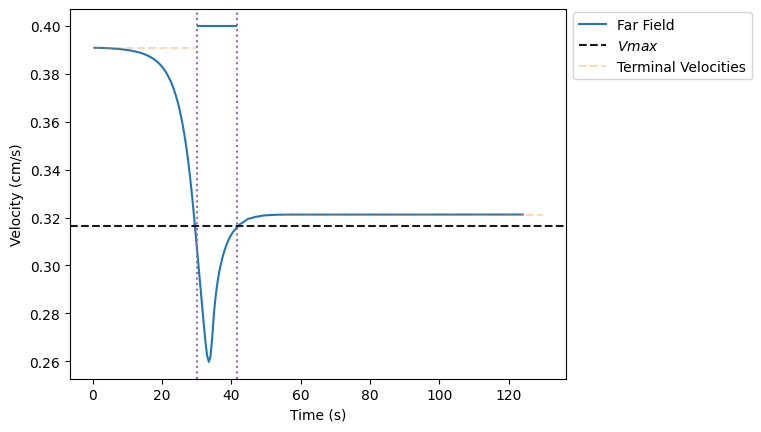

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


#plt.plot(time_full, sphvels_full, color='blue', label='Full Field')

plt.plot(time_far, sphvels_far, color='tab:blue', label='Far Field')


#plt.plot(time_exp, sphvels_expn, color='tab:orange', label = 'Experimental Data')

#plt.plot(np.linspace(0, len(sphvels_far), len(sphvels_far)), sphvels_far, color='tab:cyan', label='Far Field')

#plt.plot(time_far, sphvels_far, color='tab:pink', label='Far Field')

plt.hlines(y=0.40, xmin=t0_far, xmax=tf_far)

#plt.plot(0.5*np.linspace(0, len(sphvels_exp), len(sphvels_exp))-15, sphvels_exp, color='tab:olive', label='Experimental Data')


plt.axhline(y= -endcst*V_TermBttm, color='k', linestyle='dashed', alpha=0.9, label = r'$V max$')

# plt.axhline(y= -V_TermBttm, color='k', linestyle='dashed', alpha=0.6, label = r'$V_{Term,Bottom}$')

plt.axvline(x=t0_far, color='tab:purple', ls='dotted')
plt.axvline(x=tf_far, color='tab:purple', ls='dotted')



plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:orange', linestyle='dashed', alpha=0.3, label = r'Terminal Velocities')
plt.hlines(y=-V_TermBttm,  xmin=55, xmax=130, color='tab:orange', linestyle='dashed', alpha=0.3)

# plt.hlines(y=-V_TermTop,  xmin=0, xmax=30, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' ')
# plt.hlines(y=-V_TermBttm,  xmin=55, xmax=120, color='tab:blue', linestyle='dashed', alpha=0.3)






plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))

#plt.savefig("{filename}/Velocity_v_time_experimental.png".format(filename=filename),bbox_inches ="tight", facecolor='white')

